1) Calculate from matrix <br>
2) Calculate $R^2$ <br>
3) Maybe plot with distingished data groups

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
pd.options.display.max_rows = 10
#pd.set_option('display.max_rows', 10)

In [4]:
st = pd.read_excel('SampleData/logdataVpVs.xlsx') #use sample# as index column

In [5]:
st2= st

indDTCO= st2.index[st2['DTCO'] < 0].tolist()

indDTSM= st2.index[st2['DTSM'] < 0].tolist()

indRHOZ= st2.index[st2['RHOZ'] > 3].tolist()

u_ind= indDTCO+ indDTSM+ indRHOZ

In [6]:
st2= st2.drop(u_ind)

In [7]:
st2['Vp(m_s)']= (1/ st2['DTCO'])* (0.3048/ 10**-6)
st2['Vs(m_s)']= (1/ st2['DTSM'])* (0.3048/ 10**-6)

Text(0.5, 0, 'Vs(m/s)')

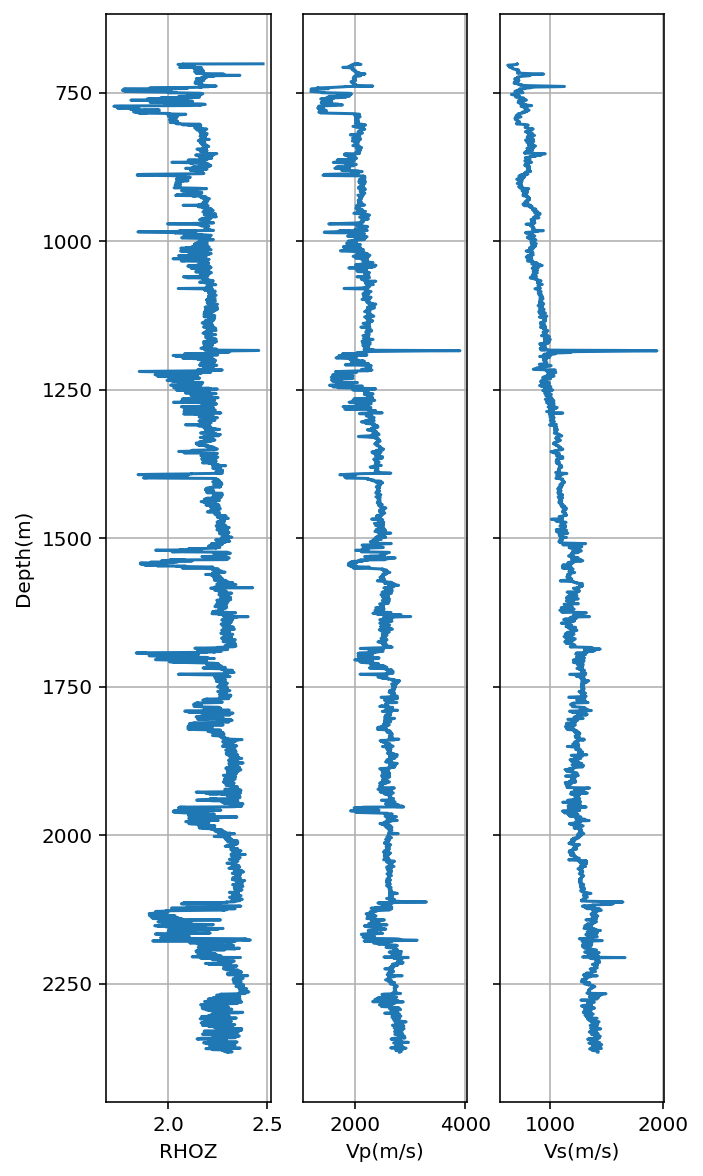

In [8]:
fig, ax_1 = plt.subplots(1,3,sharey=True)
fig.set_size_inches(5,10)

plt.sca(ax_1[0])
plt.plot(st2['RHOZ'], st2['DEPTH'])
plt.grid()
plt.ylabel('Depth(m)')
plt.xlabel('RHOZ')
#plt.ylim([1200,1250])
ax_1[0].invert_yaxis()

    
plt.sca(ax_1[1])
plt.plot(st2['Vp(m_s)'], st2['DEPTH'])
plt.grid()
plt.xlabel('Vp(m/s)')

plt.sca(ax_1[2])
plt.plot(st2['Vs(m_s)'], st2['DEPTH'])
plt.grid()
plt.xlabel('Vs(m/s)')

Mudrock Line   $Vp=1.16Vs+1360(m/s)$ 

In [9]:
st2['Mudrock']=1.16*st2['Vs(m_s)']+1360

Assuming gas has $\frac{V_p}{V_s}=1.75$ to belower

In [18]:
gas_line= [(1.75*x) for x in st2['Vs(m_s)']]

function calculating best fit parameters $ y=mx+c $

In [11]:
from statistics import mean
def best_fit(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [12]:
m, b = best_fit(st2['Vs(m_s)'],st2['Vp(m_s)'])
print(m, b)

1.19832680357611 1045.4763555158838


In [13]:
z = np.polyfit(st2['Vs(m_s)'],st2['Vp(m_s)'], 1)
z

array([   1.1983268 , 1045.47635552])

In [16]:
st2['constant']= 1
X_T= np.array([st2['constant'], st2['Vs(m_s)']])
X= np.transpose(X_T)
y= np.array(st2['Vp(m_s)'])

XTX= np.dot(X_T, X)
XTy= np.dot(X_T, y)

B= np.linalg.solve(XTX, XTy)
B

array([1045.47635552,    1.1983268 ])

In [17]:
regression_line = [(m*x)+b for x in st2['Vs(m_s)']]
regression_line_2= [(z[0]*x)+z[1] for x in st2['Vs(m_s)']]
regression_line_3 = [(B[1]*x)+B[0] for x in st2['Vs(m_s)']]

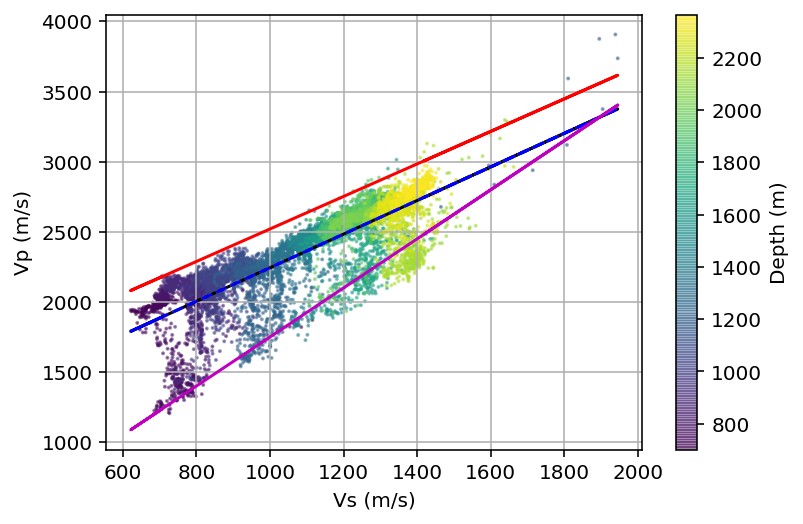

In [20]:
colors = st2['DEPTH']
plt.scatter(st2['Vs(m_s)'],st2['Vp(m_s)'], c=colors,s=1, alpha=0.5)
plt.plot(st2['Vs(m_s)'],st2['Mudrock'],'r')
plt.plot(st2['Vs(m_s)'],regression_line,'k')
plt.plot(st2['Vs(m_s)'],regression_line_2, ':y')
plt.plot(st2['Vs(m_s)'],regression_line_3, '--b')
plt.plot(st2['Vs(m_s)'],gas_line, 'm')
cbar=plt.colorbar()
cbar.set_label('Depth (m)')
plt.xlabel("Vs (m/s)")
plt.ylabel("Vp (m/s)")
plt.grid()

$R^2 = \frac{\Sigma (\hat{y} + \bar{y})^2}{\Sigma (y_i + \bar{y})^2}$

In [21]:
y_mean= np.mean(st2['Vp(m_s)'])

R2_1= ((sum(regression_line)+ y_mean)**2)/ ((sum(st2['Vp(m_s)'])+ y_mean)**2)
R2_2= ((sum(regression_line_2)+ y_mean)**2)/ ((sum(st2['Vp(m_s)'])+ y_mean)**2)
R2_3= ((sum(regression_line_3)+ y_mean)**2)/ ((sum(st2['Vp(m_s)'])+ y_mean)**2)

print(R2_1, R2_2, R2_3)

0.9999999999999238 0.9999999999999238 0.9999999999999236


In [22]:
st3= st2

In [24]:
indVp= st3.index[st3['Vp(m_s)'] >= gas_line].tolist()

u_ind2= indVp

In [25]:
st3= st3.drop(u_ind2)

In [26]:
line_fit = np.polyfit(st3['Vs(m_s)'],st3['Vp(m_s)'], 1)
line_fit

array([  1.5972186, 105.8887814])

In [27]:
regression_line_4 = [(line_fit[0]*x)+line_fit[1] for x in st3['Vs(m_s)']]

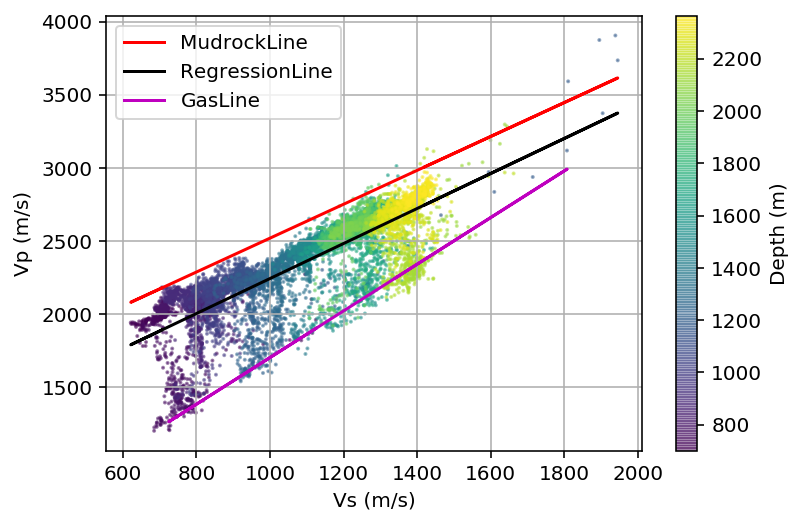

In [30]:
colors = st2['DEPTH']
plt.scatter(st2['Vs(m_s)'],st2['Vp(m_s)'], c=colors,s=1, alpha=0.5)
plt.plot(st2['Vs(m_s)'],st2['Mudrock'],'r', label='MudrockLine')
plt.plot(st2['Vs(m_s)'],regression_line,'k', label='RegressionLine')
plt.plot(st3['Vs(m_s)'],regression_line_4, 'm', label='GasLine')
plt.legend(loc='upper left')
cbar=plt.colorbar()
cbar.set_label('Depth (m)')
plt.xlabel("Vs (m/s)")
plt.ylabel("Vp (m/s)")
plt.grid()